In [2]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import unique_labels

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
DATA_PATH= r'C:\Users\deole\Downloads\hospital-info.csv'
data=pd.read_csv(DATA_PATH, encoding='latin-1')
pd.set_option('display.max_columns', 100)
data.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,3,1,2,1,0,1,1,1,-12.500000,-4.200000,-9.3,-12.4,-15.5,-15.40000,1.0,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000,-99.0,-8.255205,-2.0,-269.0,-68.0,97.0,81.0,-196.0,-65.0,-4.0,72.820855,82.0,96.12304,-0.000000,99.00000,96.000000,100.000000,67.000000,98.00000,99.000000,97.0,99.00000,91.000000,90.000000,-0.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,-3.800000,-3.320000,-5.720000,-2.720000,-1.35,-0.07,-168.260000,-0.36,-0.12,-0.68,-1.740000,-2.433000,-1.427000,-2.307000,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,3,0,1,2,1,1,2,0,-16.000000,-3.331371,-7.6,-15.5,-20.8,-15.50000,1.0,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000,-60.0,-12.000000,-3.0,-243.0,-71.0,99.0,83.0,-117.0,-27.0,-2.0,92.000000,92.0,99.00000,-1.000000,98.00000,99.000000,100.000000,89.591422,99.00000,88.000000,95.0,94.00000,100.000000,100.000000,-2.030869,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.00000,-3.000000,-5.630000,-9.180000,-2.110000,-1.25,-0.14,-179.050000,-0.47,-0.11,-0.85,-1.062000,-0.648000,-0.456000,-0.698000,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,2,0,1,1,0,1,2,1,-16.700000,-4.100000,-7.1,-15.6,-18.2,-17.90000,0.0,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000,-58.0,-8.255205,-2.0,-217.0,-78.0,100.0,87.0,-133.0,-10.0,-1.0,70.000000,88.0,96.12304,-0.000000,99.00000,100.000000,100.000000,89.591422,99.00000,97.000000,98.0,89.00000,86.000000,92.000000,-0.

In [4]:
# lets check all columns once again
all_col = list(data.columns)
len(all_col), all_col

(94,
 ['Provider ID',
  'Hospital Name',
  'Address',
  'City',
  'State',
  'ZIP Code',
  'County Name',
  'Phone Number',
  'Hospital Ownership',
  'Emergency Services',
  'Hospital overall rating',
  'Mortality national comparison',
  'Safety of care national comparison',
  'Readmission national comparison',
  'Patient experience national comparison',
  'Effectiveness of care national comparison',
  'Timeliness of care national comparison',
  'Efficient use of medical imaging national comparison',
  'MORT_30_AMI_Score',
  'MORT_30_CABG_Score',
  'MORT_30_COPD_Score',
  'MORT_30_HF_Score',
  'MORT_30_PN_Score',
  'MORT_30_STK_Score',
  'rating_group',
  'READM_30_AMI_Score',
  'READM_30_CABG_Score',
  'READM_30_COPD_Score',
  'READM_30_HF_Score',
  'READM_30_HIP_KNEE_Score',
  'READM_30_HOSP_WIDE_Score',
  'READM_30_PN_Score',
  'READM_30_STK_Score',
  'TIME_OP_21_Score',
  'TIME_OP_5_Score',
  'EFF_EDV_Score',
  'EFF_ED_1b_Score',
  'EFF_ED_2b_Score',
  'EFF_IMM_2_Score',
  'EFF_IMM

In [5]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [6]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = data.drop(demo_features, axis=1)

In [7]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
df2.head(5)

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,-12.500000,-4.200000,-9.3,-12.4,-15.5,-15.40000,1.0,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000,-99.0,-8.255205,-2.0,-269.0,-68.0,97.0,81.0,-196.0,-65.0,-4.0,72.820855,82.0,96.12304,-0.000000,99.00000,96.000000,100.000000,67.000000,98.00000,99.000000,97.0,99.00000,91.000000,90.000000,-0.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,-3.800000,-3.320000,-5.720000,-2.720000,-1.35,-0.07,-168.260000,-0.36,-0.12,-0.68,-1.740000,-2.433000,-1.427000,-2.307000,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,3,0,1,2,1,1,2,0,-16.000000,-3.331371,-7.6,-15.5,-20.8,-15.50000,1.0,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000,-60.0,-12.000000,-3.0,-243.0,-71.0,99.0,83.0,-117.0,-27.0,-2.0,92.000000,92.0,99.00000,-1.000000,98.00000,99.000000,100.000000,89.591422,99.00000,88.000000,95.0,94.00000,100.000000,100.000000,-2.030869,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.00000,-3.000000,-5.630000,-9.180000,-2.110000,-1.25,-0.14,-179.050000,-0.47,-0.11,-0.85,-1.062000,-0.648000,-0.456000,-0.698000,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,2,0,1,1,0,1,2,1,-16.700000,-4.100000,-7.1,-15.6,-18.2,-17.90000,0.0,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000,-58.0,-8.255205,-2.0,-217.0,-78.0,100.0,87.0,-133.0,-10.0,-1.0,70.000000,88.0,96.12304,-0.000000,99.00000,100.000000,100.000000,89.591422,99.00000,97.000000,98.0,89.00000,86.000000,92.000000,-0.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.00000,-3.800000,-3.850000,-10.254041,-2.500000,-1.93,-0.09,-198.330000,-0.41,-0.24,-0.91,-0.341000,-0.443000,-0.641000,-0.801000,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,3,1,1,0,1,1,2,1,-14.054091,-

In [8]:
# let create a function for creating a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [9]:
#as mentioned earlier we will only use the required feature & we will store it.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [10]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30

#we will train test split
train_data, valid_data = train_test_split(df2, test_size=0.3,
                                          stratify=df2["Hospital overall rating"],
                                          random_state=12345, shuffle=True)
print(train_data.shape, valid_data.shape)

(2139, 86) (918, 86)


In [11]:

#creating simple rating mapping
rating_map = {1: 0,2:0,3:0,4:1,5:1}

for feat in features:
    train_data[feat] = train_data[feat].map(rating_map)
    valid_data[feat] = valid_data[feat].map(rating_map)

In [12]:
#imputing by mean value
mean_values= train_data[features].mean()
train_data[features] = train_data[features].fillna(mean_values)
valid_data[features] = valid_data[features].fillna(mean_values)

In [13]:
X_train = train_data[features]
X_valid = valid_data[features]

y_train = train_data["Hospital overall rating"] -1
y_valid = valid_data["Hospital overall rating"] -1

In [14]:
# building the model and checking accuracy
model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

#clip the value and round the to convert to rating between 0 and 4
train_preds = train_preds.clip(0,4).round()
print("The training accuracy score", accuracy_score(y_train, train_preds))

The training accuracy score 0.46610565684899485


Validation accuracy 0.4662309368191721
Confusion matrix, without normalization
[[  0   0  35   0   0]
 [  0   0 197   0   0]
 [  0   0 428   0   0]
 [  0   0 225   0   0]
 [  0   0  33   0   0]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

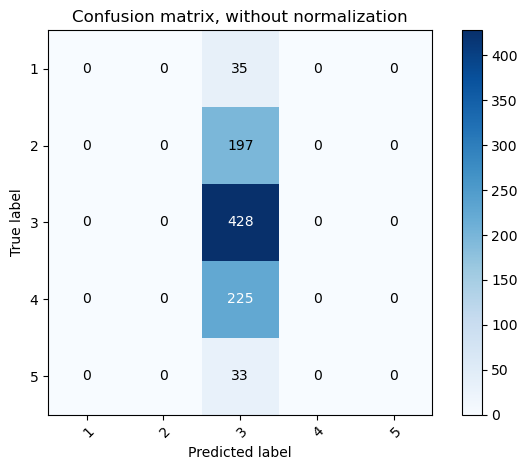

In [15]:
valid_preds = model.predict(X_valid).clip(0,4).round()
print("Validation accuracy", accuracy_score(y_valid, valid_preds))

plot_confusion_matrix(y_valid, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

In [16]:
score_features = [col for col in data.columns if "Score" in col]
print(len(score_features))

75


In [17]:
from sklearn.preprocessing import QuantileTransformer
normalize = QuantileTransformer(output_distribution="normal")
train_data[score_features] = normalize.fit_transform(train_data[score_features])
valid_data[score_features] = normalize.transform(valid_data[score_features])

In [18]:
score_features_mean = train_data[score_features].mean()
train_data[score_features] = train_data[score_features].fillna(score_features_mean)
valid_data[score_features] = valid_data[score_features].fillna(score_features_mean)

Training accuracy 0.8929406264609631
Validation accuracy 0.8888888888888888
Confusion matrix, without normalization
[[ 28   7   0   0   0]
 [  9 167  21   0   0]
 [  0  13 400  15   0]
 [  0   0  27 194   4]
 [  0   0   0   6  27]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

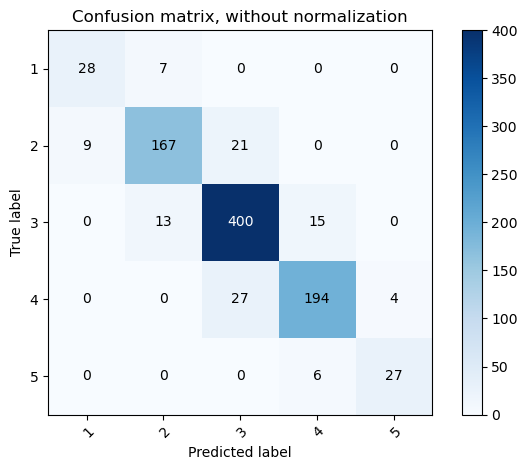

In [19]:
X_train = train_data[features+score_features]
X_valid = valid_data[features+score_features]

model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

#we need to clip values and round them to convert to ratings between 0 and 4
train_preds = train_preds.clip(0, 4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

valid_preds = model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_valid, valid_preds))

plot_confusion_matrix(y_valid, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

#### 2. if our client wanted more accurate model and is confortable with black box model, we can use descission tree

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf_model=RandomForestRegressor(n_estimators=500,
                               min_samples_leaf=4,
                               max_features=0.33,
                               n_jobs=-1,
                               random_state=123)

In [23]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.33, min_samples_leaf=4, n_estimators=500,
                      n_jobs=-1, random_state=123)

Training accuracy 0.9644693782141187
Validation accuracy 0.8061002178649237
Confusion matrix, without normalization
[[ 11  24   0   0   0]
 [  0 149  48   0   0]
 [  0  12 398  18   0]
 [  0   0  59 165   1]
 [  0   0   0  16  17]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

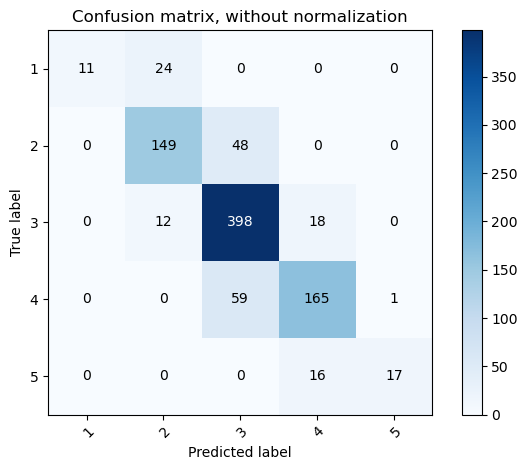

In [24]:
train_preds = rf_model.predict(X_train)
#Clip value and round to convert rating between 0 and 4
train_preds = train_preds.clip(0,4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

valid_preds = rf_model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_valid, valid_preds))

plot_confusion_matrix(y_valid, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

#### overfits

In [31]:
# Although random forest model achieved more accuracy on its training data but worked poor on validation data
# in this case it seem there is not much non-linearity and our linear regression model is pretty good.

#### 3. unsupervised approach

In [25]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [26]:
def get_train_val_data():
    train_data, valid_data = train_test_split(data,test_size=0.2,
                                              stratify=df2["Hospital overall rating"],
                                          random_state=12345, shuffle=True)
    
    features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']
    #maping 
    rating_map = {1: 0,2:0,3:0,4:1,5:1}
    
    for feat in features:
        train_data[feat] = train_data[feat].map(rating_map)
        valid_data[feat] = valid_data[feat].map(rating_map)
    #imputing by mean value
    mean_values= train_data[features].mean()
    train_data[features] = train_data[features].fillna(mean_values)
    valid_data[features] = valid_data[features].fillna(mean_values)

    #preprocess indiviual measure
    score_features=[col for col in data.columns if "Score" in col]
    score_features_mean = train_data[score_features].mean()
    train_data[score_features] = train_data[score_features].fillna(score_features_mean)
    valid_data[score_features] = valid_data[score_features].fillna(score_features_mean)

    # standarized all scores
    Scaler = StandardScaler()
    train_data[score_features] = Scaler.fit_transform(train_data[score_features])
    valid_data[score_features] = Scaler.fit_transform(valid_data[score_features])

    return train_data, valid_data

train_data, valid_data = get_train_val_data()    

In [27]:
#cms Approach for finding the rating
#performing factor Analysis on the data

fa= FactorAnalysis(1)

mortality_train = train_data.filter(regex="^MORT_*").fillna("median")

mortality_valid = valid_data.filter(regex="^MORT_*").fillna("median")

mort_fa_train = fa.fit_transform(mortality_train)
mort_fa_valid = fa.fit_transform(mortality_valid)

Loading for MORT_30_AMI_Score is 0.5376727706120022
Loading for MORT_30_CABG_Score is 0.28536508715012765
Loading for MORT_30_COPD_Score is 0.6806312303156309
Loading for MORT_30_HF_Score is 0.7802521721418427
Loading for MORT_30_PN_Score is 0.7487931017462774
Loading for MORT_30_STK_Score is 0.5342390353539272


<Axes: >

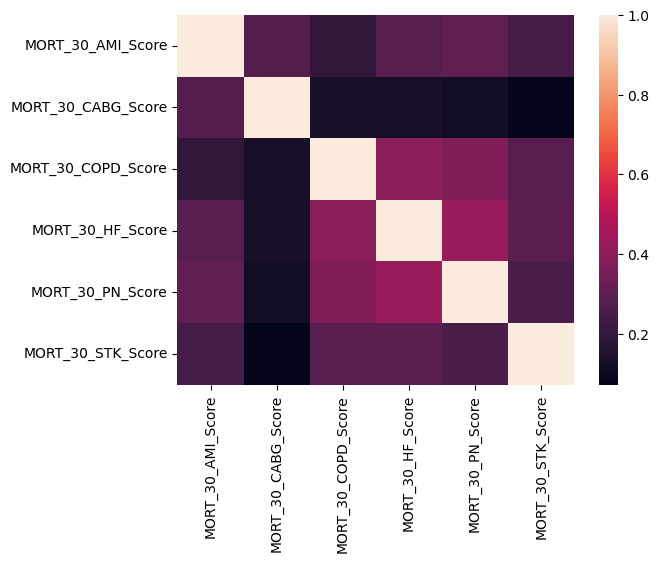

In [42]:
for col in mortality_train.columns:
    print("Loading for {} is {}".format(col, np.corrcoef(mortality_train[col].values, mort_fa_train[:,0])[0,1]))

sns.heatmap(mortality_train.corr())

In [28]:
#Let's create a function to find the latent factors
def get_latent_factor(train, valid, like=""):

    grp_train = X_train.filter(regex=like).fillna("median")

    grp_valid = X_valid.filter(regex=like).fillna("median")


    grp_fa_train = fa.fit_transform(grp_train)
    grp_fa_valid = fa.transform(grp_valid)
    
    for col in grp_train.columns:
        print("Loading for {} is {}".format(col,
                                            np.corrcoef(grp_train[col].values,
                                                        grp_fa_train[:, 0])[0, 1]))

    sns.heatmap(grp_train.corr())
    plt.show()
    return grp_fa_train, grp_fa_valid

Loading for READM_30_AMI_Score is 0.5149269032282575
Loading for READM_30_CABG_Score is 0.22043179993650644
Loading for READM_30_COPD_Score is 0.6219150562915154
Loading for READM_30_HF_Score is 0.7126761795356157
Loading for READM_30_HIP_KNEE_Score is 0.30806055653979353
Loading for READM_30_HOSP_WIDE_Score is 0.9229369614906552
Loading for READM_30_PN_Score is 0.7348190921541795
Loading for READM_30_STK_Score is 0.5358398959772712


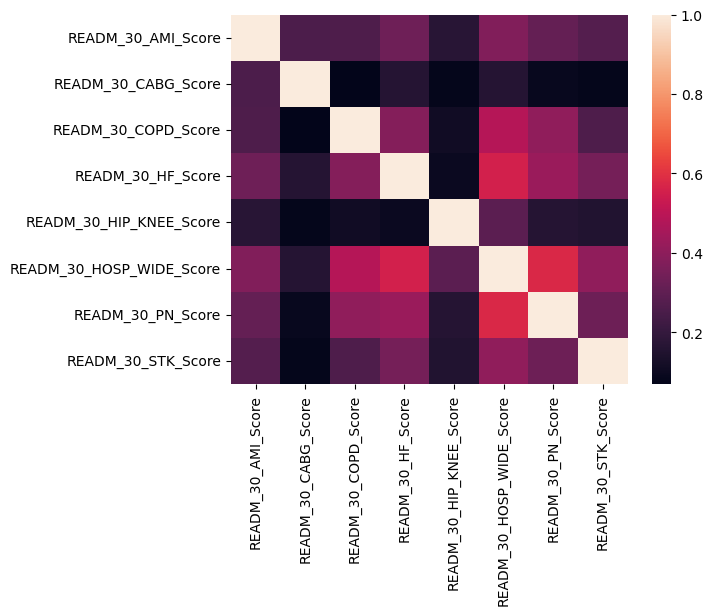

In [48]:
readm_fa_train, readm_fa_valid = get_latent_factor(X_train,X_valid, like="READM_*")

Loading for TIME_OP_21_Score is 0.696083733000126
Loading for TIME_OP_5_Score is 0.8297742533482032


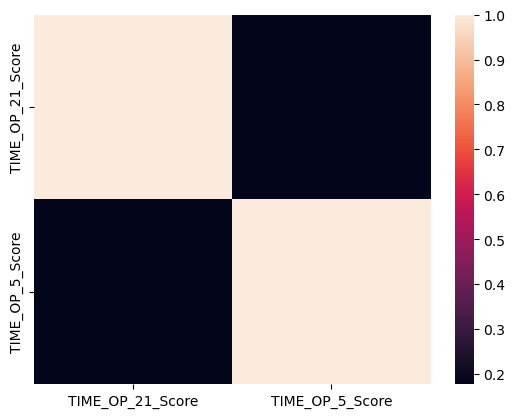

In [58]:
time_fa_train, time_fa_valid = get_latent_factor(X_train,X_valid, like="TIME_*")

Loading for EXP_H_CLEAN_STAR_RATING_Score is 0.648735788037699
Loading for EXP_H_COMP_1_STAR_RATING_Score is 0.8226385068044378
Loading for EXP_H_COMP_2_STAR_RATING_Score is 0.72744690972191
Loading for EXP_H_COMP_3_STAR_RATING_Score is 0.8328700229988129
Loading for EXP_H_COMP_4_STAR_RATING_Score is 0.8057643759780784
Loading for EXP_H_COMP_5_STAR_RATING_Score is 0.8139298415038948
Loading for EXP_H_COMP_6_STAR_RATING_Score is 0.6727215540568147
Loading for EXP_H_COMP_7_STAR_RATING_Score is 0.7911178640578824
Loading for EXP_H_HSP_RATING_STAR_RATING_Score is 0.8434734725514239
Loading for EXP_H_QUIET_STAR_RATING_Score is 0.5873075395627596
Loading for EXP_H_RECMND_STAR_RATING_Score is 0.7907128291201565
Loading for EXP_H_STAR_RATING_Score is 0.9564459294186918


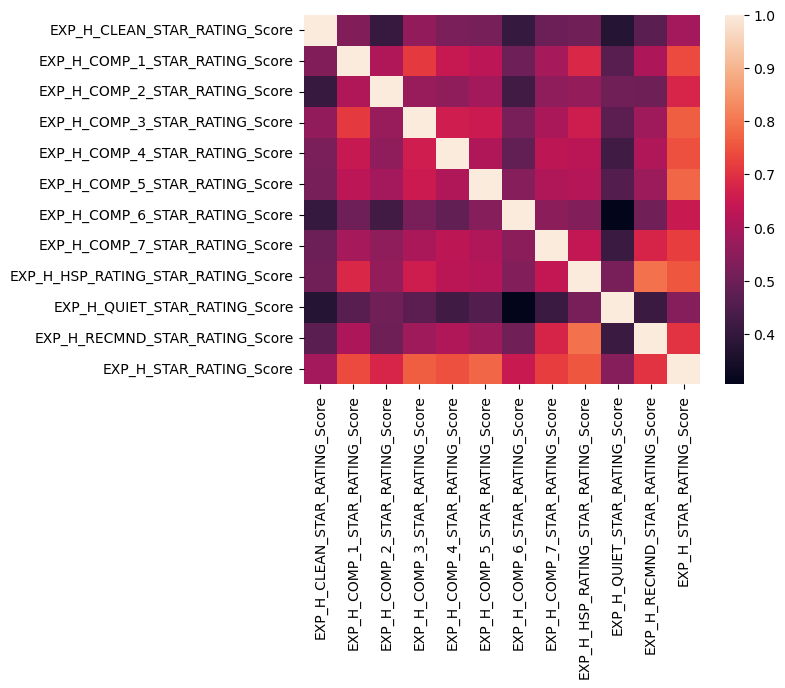

In [51]:
exp_fa_train, exp_fa_valid = get_latent_factor(X_train,X_valid, like="EXP_*")

Loading for MED_OP_10_Score is -0.3461417593649853
Loading for MED_OP_11_Score is -0.9978143609768585
Loading for MED_OP_13_Score is 0.007357292343126999
Loading for MED_OP_14_Score is -0.002964658071441781
Loading for MED_OP_8_Score is -0.06375433651948792
Loading for MED_OP_9_Score is -0.016286279166150962


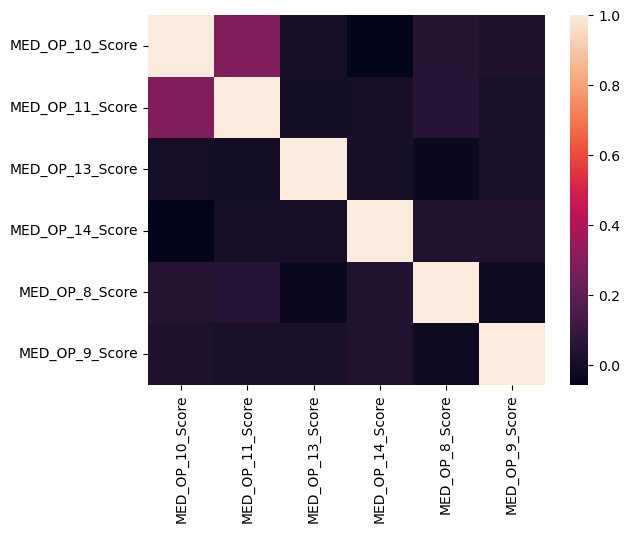

In [59]:
med_fa_train, med_fa_valid = get_latent_factor(X_train,X_valid, like="MED_OP_*")

Loading for SAFETY_COMP_HIP_KNEE_Score is -0.10422313117653016
Loading for SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score is -0.6740519289916698
Loading for SAFETY_PSI_13_POST_SEPSIS_Score is -0.20066280007297488
Loading for SAFETY_PSI_14_POSTOP_DEHIS_Score is -0.06076325923291216
Loading for SAFETY_PSI_15_ACC_LAC_Score is -0.6966730706101525
Loading for SAFETY_PSI_3_ULCER_Score is -0.27479358532708925
Loading for SAFETY_PSI_4_SURG_COMP_Score is -0.07231616611320552
Loading for SAFETY_PSI_6_IAT_PTX_Score is -0.22639923071672885
Loading for SAFETY_PSI_7_CVCBI_Score is -0.23178295116986766
Loading for SAFETY_PSI_90_SAFETY_Score is -0.9999993999587984
Loading for SAFETY_HAI_1_SIR_Score is -0.08550325038025183
Loading for SAFETY_HAI_1a_SIR_Score is -0.0562063876193129
Loading for SAFETY_HAI_2_SIR_Score is -0.10561055927536239
Loading for SAFETY_HAI_2a_SIR_Score is -0.07063571843913898
Loading for SAFETY_HAI_3_SIR_Score is -0.058460676303805206
Loading for SAFETY_HAI_4_SIR_Score is -0.0278640590635

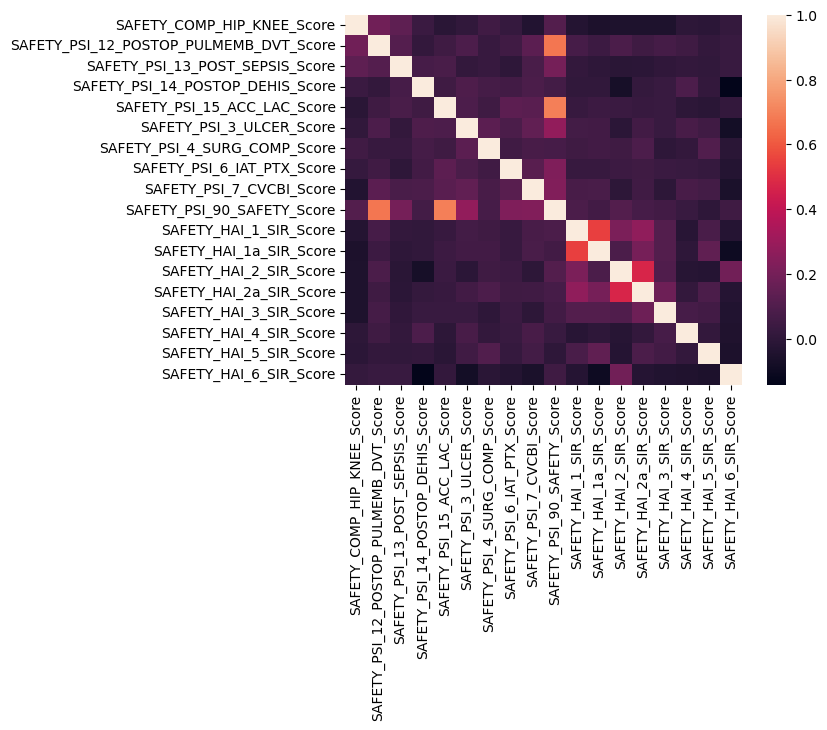

In [52]:
safety_fa_train , safety_fa_valid = get_latent_factor(X_train,X_valid, like="SAFETY_*")

Loading for EFF_EDV_Score is 0.5706783997941466
Loading for EFF_ED_1b_Score is 0.9923996436319019
Loading for EFF_ED_2b_Score is 0.8995378499509437
Loading for EFF_IMM_2_Score is 0.1479883477100122
Loading for EFF_IMM_3_OP_27_FAC_ADHPCT_Score is 0.08700246257532247
Loading for EFF_OP_18b_Score is 0.7467867847865588
Loading for EFF_OP_20_Score is 0.46109167732474293
Loading for EFF_OP_22_Score is 0.32490418539080995
Loading for EFF_OP_29_Score is 0.02730715082241917
Loading for EFF_OP_30_Score is 0.05608437342009763
Loading for EFF_OP_4_Score is 0.0613235303981243
Loading for EFF_PC_01_Score is -0.023467800477109918
Loading for EFF_STK_1_Score is 0.013047928506449685
Loading for EFF_STK_10_Score is -0.09931496186204199
Loading for EFF_STK_2_Score is -0.11269271436157192
Loading for EFF_STK_4_Score is -0.15997476637001953
Loading for EFF_STK_5_Score is -0.031081604063358192
Loading for EFF_STK_6_Score is -0.10133073995468572
Loading for EFF_VTE_1_Score is 0.0852321164776128
Loading for E

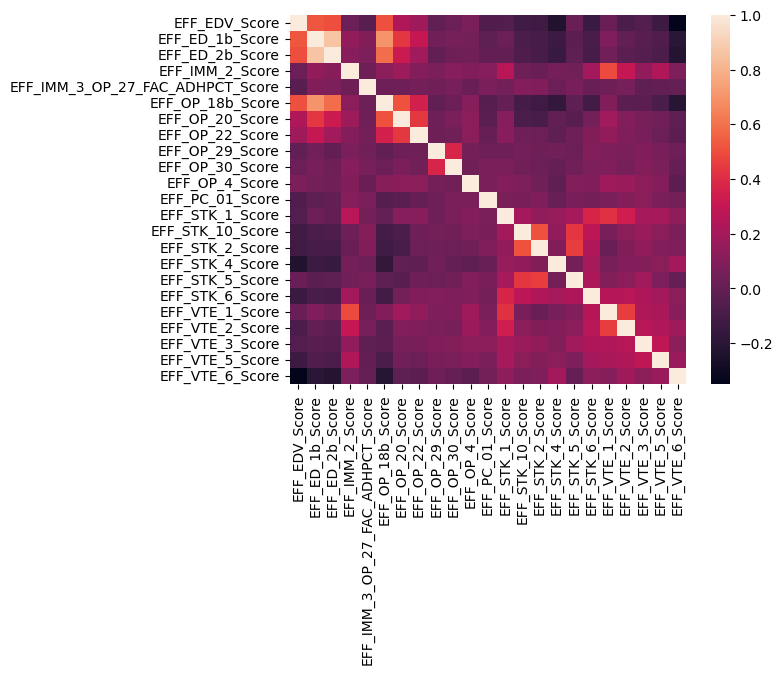

In [60]:
eff_fa_train, eff_fa_valid = get_latent_factor(X_train,X_valid, like="EFF_*")

In [ ]:
#### Obervations
#1. Patients experience has higest positive correlation
#2. hospital wide readmission after dischasrge score has higest positive correlation with rating
#3. Mortality related scores are also in top 10

In [29]:
!pip install eli5

Defaulting to user installation because normal site-packages is not writeable


In [30]:
import eli5
# your code goes here
eli5.show_weights(model, feature_names=features+score_features)

Weight?,Feature
+119496620390.391,Readmission national comparison
+48254293791.478,Effectiveness of care national comparison
+17448950215.041,Timeliness of care national comparison
+20489721.705,Mortality national comparison
+1.982,<BIAS>
+0.266,SAFETY_PSI_90_SAFETY_Score
+0.127,MORT_30_HF_Score
+0.119,MORT_30_PN_Score
+0.075,MORT_30_COPD_Score
+0.049,MORT_30_AMI_Score


In [31]:
data_evanston = train_data.loc[data['Provider ID'] == 140010]

data_evanston

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
839,140010,EVANSTON HOSPITAL,2650 RIDGE AVE,EVANSTON,IL,60201,COOK,8474328000,Voluntary,Yes,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.607052,2.226688,2.074546,1.746423,1.546563,1.589451,1.0,-0.485951,1.855818,-0.245307,-0.517595,-1.820397,-0.432864,-0.403708,0.208233,-0.459781,-0.00079,-1.54318,0.469093,0.52923,0.317444,-2.543043,-0.413626,-1.353918,0.476466,0.474773,0.656642,0.005045,0.650288,0.22123,0.557019,0.46705,0.963973,0.257493,0.649278,0.403155,0.624578,0.7907,0.013861,-1.569215,0.302114,-0.494633,-0.094536,-0.170482,-0.106969,-1.160571,-0.336095,-0.5581,0.676769,0.089088,0.91759,-0.12964,-0.498615,-5.968279,0.844602,1.508396,0.24943,0.83899,3.639875,1.500889,-0.142953,-3.166991,-0.122165,-0.168321,-0.228217,0.286077,-0.324273,1.986602,0.244003,-0.244564,0.263801,0.185105,-0.535937,0.546698,0.38036,0.726212


In [32]:
rating_prediction = model.predict(data_evanston[features+score_features])[0]

print("Predicted and actual ratings are ", rating_prediction, data_evanston["Hospital overall rating"].values[0])

Predicted and actual ratings are  1.9481894772528014 3


In [33]:
eli5.explain_prediction(model, data_evanston[features+score_features], feature_names=features+score_features)

Explanation(estimator='LinearRegression()', description=None, error=None, method='linear model', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=1.9818881646819255, std=None, value=1.0), FeatureWeight(feature='MORT_30_HF_Score', weight=0.22243670504633542, std=None, value=1.746423098002802), FeatureWeight(feature='MORT_30_PN_Score', weight=0.18391519712658327, std=None, value=1.5465630145671483), FeatureWeight(feature='MORT_30_COPD_Score', weight=0.15563013670104556, std=None, value=2.074546180814812), FeatureWeight(feature='READM_30_HOSP_WIDE_Score', weight=0.1387799970218053, std=None, value=-0.4328635717961245), FeatureWeight(feature='MORT_30_AMI_Score', weight=0.12724234362226197, std=None, value=2.6070523291466663), FeatureWeight(feature='SAFETY_PSI_4_SURG_COMP_Score', weight=0.0829213421711497, std=None, value=3.6398748027652155), FeatureWeight(feature='MORT_30_STK_Score', weight=0.060735456678995124, std=None, value=1.5894514222194656), FeatureWeight(feature='EXP_H_RECMND_STAR_RATING_Score', weight=0.025452642191795147, std=None, value=0.9175902406279237), FeatureWeight(feature='READM_30_HIP_KNEE_Score', weight=0.02508615504211846, std=None, value=-1.8203972394079173), FeatureWeight(feature='EFF_ED_1b_Score', weight=0.022575214839719557, std=None, value=0.46909277046100656), FeatureWeight(feature='MORT_30_CABG_Score', weight=0.021299240970161924, std=None, value=2.2266875657624365), FeatureWeight(feature='EXP_H_HSP_RATING_STAR_RATING_Score', weight=0.018014878611975187, std=None, value=0.6767687501945577), FeatureWeight(feature='SAFETY_PSI_14_POSTOP_DEHIS_Score', weight=0.017507309401339623, std=None, value=1.5083959584498503), FeatureWeight(feature='READM_30_HF_Score', weight=0.017377303653831715, std=None, value=-0.5175952606556142), FeatureWeight(feature='MED_OP_10_Score', weight=0.012001371620124745, std=None, value=0.26380073469612453), FeatureWeight(feature='SAFETY_PSI_15_ACC_LAC_Score', weight=0.010653457094557785, std=None, value=0.2494297196977409), FeatureWeight(feature='READM_30_PN_Score', weight=0.008989896816752935, std=None, value=-0.4037083530845193), FeatureWeight(feature='SAFETY_PSI_3_ULCER_Score', weight=0.00817625886410287, std=None, value=0.8389899757490428), FeatureWeight(feature='READM_30_AMI_Score', weight=0.00796419870593272, std=None, value=-0.4859509818022757), FeatureWeight(feature='EXP_H_CLEAN_STAR_RATING_Score', weight=0.0067382280586690295, std=None, value=0.302114175603837), FeatureWeight(feature='READM_30_COPD_Score', weight=0.006191488493199471, std=None, value=-0.2453074724217197), FeatureWeight(feature='EFF_OP_30_Score', weight=0.0056585515004514446, std=None, value=0.6566424632732818), FeatureWeight(feature='SAFETY_PSI_6_IAT_PTX_Score', weight=0.005650291744901996, std=None, value=1.500889250589577), FeatureWeight(feature='MED_OP_14_Score', weight=0.005042711789109192, std=None, value=0.5466983619703226), FeatureWeight(feature='EFF_STK_6_Score', weight=0.00424523333836487, std=None, value=0.6492779744762663), FeatureWeight(feature='EFF_STK_10_Score', weight=0.0036696326305094827, std=None, value=0.557019210360323), FeatureWeight(feature='EFF_ED_2b_Score', weight=0.0035533058481050884, std=None, value=0.5292299610074417), FeatureWeight(feature='MED_OP_9_Score', weight=0.003500594238744989, std=None, value=0.7262121089101327), FeatureWeight(feature='EFF_VTE_3_Score', weight=0.00345665823986448, std=None, value=0.7907000153848466), FeatureWeight(feature='EFF_VTE_1_Score', weight=0.003328045449683885, std=None, value=0.40315487354987634), FeatureWeight(feature='EFF_PC_01_Score', weight=0.0033042285948645706, std=None, value=0.6502880636427762), FeatureWeight(feature='SAFETY_PSI_13_POST_SEPSIS_Score', weight=0.0030720812117450585, std=None, value=0.8446016331113756), FeatureWeight(feature='MED_OP_8_Score', weight=0.0020583649463023607, std=None, value=0.3803598699328477), FeatureWeight(feature='EXP_H_STAR

### Recommendations 1:
### For Safety, as given by the low negative correlation ELI5 score we can say that the hospital needs to improve PSI_90_SAFETY_Score, SAFETY_PSI_12_POSTOP_PULMEMB_DVT_SCORE,SAFETY_HAI_4_SIR_Score and so on
### Similarly, for Experience, it needs to improve its EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score and so on

In [34]:
#For this hospital, let's go ahead and analyse the group scores first
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']
data_evanston[features]

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
839,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#We observe that some readmission measures and mortality measures in the top
#Let's check their influences as well by loading the measure scores from the main dataset

df_mort_readm2 = pd.read_csv("Readmissions and Deaths - Hospital.csv")
features = ['Measure ID', 'Compared to National']
data_evanston2 = df_mort_readm2.loc[df_mort_readm2['Provider ID'] == 140010]

data_evanston2[features]

,Measure ID,Compared to National
15736,MORT_30_AMI,Better than the National Rate
15737,MORT_30_CABG,No Different than the National Rate
15738,MORT_30_COPD,Better than the National Rate
15739,MORT_30_HF,Better than the National Rate
15740,MORT_30_PN,Better than the National Rate
15741,MORT_30_STK,Better than the National Rate
15742,READM_30_AMI,No Different than the National Rate
15743,READM_30_CABG,No Different than the National Rate
15744,READM_30_COPD,No Different than the National Rate
15745,READM_30_HF,No Different than the National Rate


### Recommendations 2:
### Most Mortality measures are better than national rate and also the only average one MORT_30_CABG doesn't have a high ELI5 score. Therefore no need to recommend any changes here

### For Readmission however, most of the measure scores are average only and from the ELI5 score, we can clearly see that READM_30_HOSP_WIDE_Score and Readmission national comparison have a high values. Therefore, in order to improve their ratings they need to focus on all the average measures - READM_30_HOSP_WIDE,READM_30_HF,etc. which'll indirectly improve the group average scores.